In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
r = np.array([1., 1.2])
th = np.deg2rad([10, 45.])
r, th

(array([1. , 1.2]), array([0.17453293, 0.78539816]))

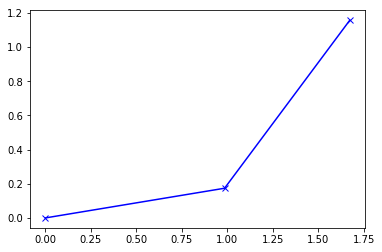

In [3]:
def fk(r,th):
    x, y = [0, 0]
    xy = [[x, y]]
    th_ = 0
    for i, (r,t) in enumerate(zip(r, th)):
        th_ += t
        x += r * np.cos(th_)
        y += r * np.sin(th_)
        xy.append([x, y])
    return np.array([x,y]), np.array(xy)

xy, xy_array= fk(r, th)
plt.plot(xy_array[:,0], xy_array[:,1], "bx-")

In [4]:
def jaco(r, th):
    n = th.shape[0]
    j = np.zeros((n, n))
    j[0,0] = - r[0] * np.sin(th[0]) - r[1] * np.sin(th[0] + th[1])
    j[0,1] = - r[1] * np.sin(th[0] + th[1])
    j[1,0] = + r[0] * np.cos(th[0]) + r[1] * np.cos(th[0] + th[1])
    j[1,1] = + r[1] * np.cos(th[0] + th[1])
    return j
j = jaco(r, th)

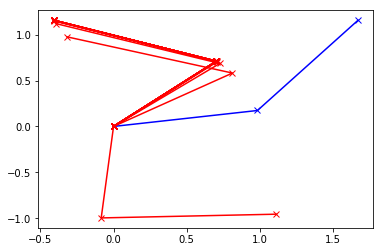

In [5]:
def ik(r, xy, dt=0.001):
    th_ = np.random.uniform(-np.pi, np.pi, size=xy.shape)
    for i in range(20000):
        xy_, _ = fk(r, th_)
        j = np.linalg.inv(jaco(r, th_))
        th_ = th_ - dt * (xy_ - xy) * j.dot(th_.reshape(2,1)).reshape(2)
        
        if i % 1000 == 0:
            _, xy_array= fk(r, th_)
            plt.plot(xy_array[:,0], xy_array[:,1], "rx-")
    return th_
xy, xy_array= fk(r, th)
plt.plot(xy_array[:,0], xy_array[:,1], "bx-")
xy_, xy_array = fk(r, ik(r, xy))
plt.plot(xy_array[:,0], xy_array[:,1], "rx-")